# Description of Algorithm
(how did you conduct pre-/post- processing, parameter selection)

# **project_dataset1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-cx6gr7u9
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-cx6gr7u9
  Created wheel for mlxtend: filename=mlxtend-0.18.0.dev0-py2.py3-none-any.whl size=1588779 sha256=64af26cf5723c82209fedddd8742e369fd6913d6ea8b285a7936a7575f1a3580
  Stored in directory: /tmp/pip-ephem-wheel-cache-_4o0qby6/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!ls drive/My\ Drive/ML\ Project/data

project3_dataset1.txt  project3_dataset2.txt


In [ ]:
# You might need to change this path or put the ML project folder in your drive 
import_path = 'drive/My Drive/ML Project/data/project3_dataset1.txt'
dataset_1 = pd.read_csv(import_path, sep="\t", header=None)
print(dataset_1.shape)
dataset_1.head()


(569, 31)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


***Split into labels and data***

In [ ]:
dataset1_features = dataset_1.drop([30], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset1_labels = dataset_1[30].copy()
print(dataset1_features.shape)
print(dataset1_labels.shape)

(569, 30)
(569,)


***Train/Test Split to Avoid Overfitting***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset1_features, dataset1_labels, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


***Normalization***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

dataset1_prepared = num_pipeline.fit_transform(X_train)
dataset1_test_prepared = num_pipeline.fit_transform(X_test)
print("Normalized")

Normalized


In [ ]:
# Check to see if the shapes match
print(X_train.shape)
print(dataset1_prepared.shape)

(455, 30)
(455, 30)


***Training and Predictions***

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf')
classifier.fit(dataset1_prepared, y_train)
y_pred = classifier.predict(dataset1_test_prepared)
np.mean(y_pred != y_test)

0.02631578947368421

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, dataset1_prepared, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.05)


***Hyperparameter Tuning with 10 Fold Cross Validation***

Need to tune gamma and C simutaneously using grid search

In [ ]:
import pandas as pd

gammaParam = []

# Calculating accuracy for gamma values between 0.0001 and 10 & c values between 0.1 to 1000
for i in range(-4, 2):
  cParam = []
  for j in range(-1,4):
    svmClassifier = svm.SVC(kernel='rbf',gamma=pow(10,i), C=pow(10,j))
    svmClassifier.fit(dataset1_prepared, y_train)
    scores = cross_val_score(svmClassifier, dataset1_prepared, y_train, cv=10)
    cParam.append(np.mean(scores))
  gammaParam.append(cParam)
gammaParam = np.asarray(gammaParam)
gammaVals = [ pow(10,i)for i in range(-4, 2) ]
cVals = [ pow(10,j) for j in range(-1, 4) ]
table = pd.DataFrame(gammaParam, index=gammaVals, columns=cVals)

print(table)
#Winner is C=100 and Gamma = 0.001

           0.1       1.0       10.0      100.0     1000.0
0.0001   0.632995  0.749324  0.947295  0.969227  0.975894
0.0010   0.742705  0.947295  0.971401  0.978019  0.967053
0.0100   0.947246  0.962657  0.975845  0.955990  0.960338
0.1000   0.918647  0.949469  0.951546  0.953720  0.953720
1.0000   0.632995  0.637343  0.639517  0.639517  0.639517
10.0000  0.632995  0.632995  0.632995  0.632995  0.632995


In [ ]:
from sklearn.model_selection import cross_val_score

#Create updated classifier
classifierNew = svm.SVC(kernel='rbf', C=100, gamma=0.001)
classifierNew.fit(dataset1_prepared, y_train)
y_pred = classifierNew.predict(dataset1_test_prepared)


scores = cross_val_score(classifierNew, dataset1_prepared, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.04)


***Accuracy, Precision, Recall, F-1 measure, and AUC***

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69  0]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       1.00      0.89      0.94        45

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import numpy as np
from sklearn import metrics
l,

0.9444444444444444

***Bias-Variance tradeoff and overfitting vs Underfitting***

In [ ]:
def plot_bias_var_tradeoff(xrange, bias, variance, err):
  x = xrange
  plt.figure(figsize=(12, 6))
  plt.plot(x, bias, marker='o')
  plt.plot(x, variance, marker='o',)
  plt.plot(x, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  # plt.xticks(np.arange(min(parameters), max(parameters), 1.0))
  plt.title('Bias-Varaince tradeoff')
  plt.xlabel('C log(10) Value')
  plt.ylabel('Error')

Dataset 1:


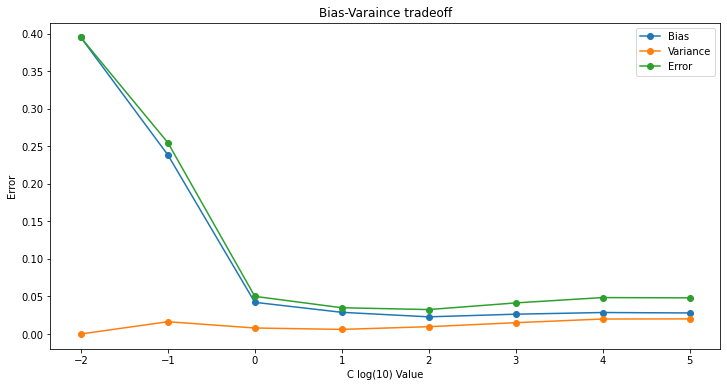

In [ ]:
import pandas as pd
from sklearn.metrics import explained_variance_score
from mlxtend.evaluate import bias_variance_decomp

c_vals = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
print('Dataset 1:')
# Calculating error for c values between 0.1 and 1000
bias_1 = []
var_1 = []
err_1 = []
for j in c_vals:
  svmClassifier = svm.SVC(kernel='rbf',gamma=0.001, C=j, )
  svmClassifier.fit(dataset1_prepared, y_train)

  mse, bias, var = bias_variance_decomp(svmClassifier, np.array(dataset1_prepared), np.array(y_train), np.array(dataset1_test_prepared), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

plot_bias_var_tradeoff(range(-2,6), bias_1, var_1, err_1)

#Overfitting when C>100 and underfitting when C<100

Dataset 1:


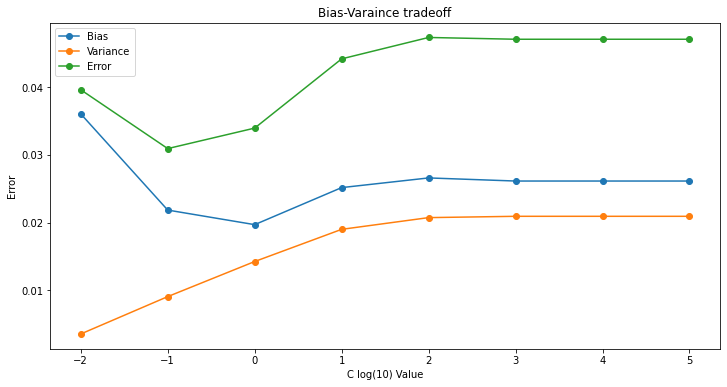

In [ ]:
import pandas as pd
from sklearn.metrics import explained_variance_score
from mlxtend.evaluate import bias_variance_decomp

c_vals = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
print('Dataset 1:')
# Calculating error for c values between 0.1 and 1000
bias_1 = []
var_1 = []
err_1 = []
for j in c_vals:
  svmClassifier = svm.SVC(kernel='linear',gamma=0.001, C=j, )
  svmClassifier.fit(dataset1_prepared, y_train)

  mse, bias, var = bias_variance_decomp(svmClassifier, np.array(dataset1_prepared), np.array(y_train), np.array(dataset1_test_prepared), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

plot_bias_var_tradeoff(range(-2,6), bias_1, var_1, err_1)

#Overfitting when C>0.1 and underfitting when C<0.1

In [ ]:
from sklearn.model_selection import cross_val_score

#Create updated classifier
classifierNew = svm.SVC(kernel='linear',gamma=0.001, C=0.1 )
classifierNew.fit(dataset1_prepared, y_train)
y_pred = classifierNew.predict(dataset1_test_prepared)


scores = cross_val_score(classifierNew, dataset1_prepared, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.05)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn import metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

[[69  0]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



0.9666666666666667

# **project_dataset2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!ls drive/My\ Drive/ML\ Project/data

project3_dataset1.txt  project3_dataset2.txt


In [ ]:
# You might need to change this path or put the ML project folder in your drive 
import_path = 'drive/My Drive/ML Project/data/project3_dataset2.txt'
dataset_2 = pd.read_csv(import_path, sep="\t", header=None)
print(dataset_2.shape)
dataset_2.tail()


(462, 10)


,0,1,2,3,4,5,6,7,8,9
457,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
458,136,2.80,2.53,9.28,Present,61,20.70,4.55,25,0
459,138,4.50,2.85,30.11,Absent,55,24.78,24.89,56,1
460,170,7.60,5.50,37.83,Present,42,37.41,6.17,54,1
461,128,0.00,10.58,31.81,Present,46,28.41,14.66,48,0


***Split into labels and data***

In [ ]:
dataset2_features = dataset_2.drop([9], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset2_labels = dataset_2[9].copy()
dataset2_features[4] = 0 if dataset2_labels[4]=='Absent' else 1 #Convert absent and present into binary 0 and 1 respectively
print(dataset2_features.shape)
print(dataset2_labels.shape)

(462, 9)
(462,)


***Train/Test Split to Avoid Overfitting***

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2_features, dataset2_labels, test_size=0.20)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(369, 9)
(93, 9)
(369,)
(93,)


***Normalization***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

dataset2_prepared = num_pipeline.fit_transform(X_train2)
dataset2_test_prepared = num_pipeline.fit_transform(X_test2)
print("Normalized")

Normalized


In [ ]:
# Check to see if the shapes match
print(X_train2.shape)
print(dataset2_prepared.shape)

(369, 9)
(369, 9)


***Training and Predictions***

In [ ]:
from sklearn import svm
classifier2 = svm.SVC(kernel='rbf')
classifier2.fit(dataset2_prepared, y_train2)
y_pred2 = classifier2.predict(dataset2_test_prepared)
np.mean(y_pred2 != y_test2)

0.20430107526881722

***Hyperparameter Tuning with 10 Fold Cross Validation***

Need to tune gamma and C simutaneously using grid search

In [ ]:
import pandas as pd

gammaParam = []

# Calculating accuracy for gamma values between 0.0001 and 10 & c values between 0.1 to 10000
for i in range(-4, 2):
  cParam = []
  for j in range(-1,5):
    svmClassifier = svm.SVC(kernel='rbf',gamma=pow(10,i), C=pow(10,j))
    svmClassifier.fit(dataset2_prepared, y_train2)
    scores = cross_val_score(svmClassifier, dataset2_prepared, y_train2, cv=10)
    cParam.append(np.mean(scores))
  gammaParam.append(cParam)
gammaParam = np.asarray(gammaParam)
gammaVals = [ pow(10,i)for i in range(-4, 2) ]
cVals = [ pow(10,j) for j in range(-1, 5) ]
table = pd.DataFrame(gammaParam, index=gammaVals, columns=cVals)

print(table)
#Winner is C=10 and Gamma = 0.01

          0.1       1.0       10.0      100.0     1000.0    10000.0
0.0001   0.636862  0.636862  0.636862  0.688514  0.683183  0.672372
0.0010   0.636862  0.636862  0.691216  0.683183  0.694069  0.672222
0.0100   0.636862  0.693919  0.696697  0.666892  0.669595  0.672222
0.1000   0.636862  0.672297  0.658784  0.593619  0.618093  0.618093
1.0000   0.636862  0.609760  0.590916  0.590916  0.590916  0.590916
10.0000  0.636862  0.636862  0.636862  0.636862  0.636862  0.636862


In [ ]:
from sklearn.model_selection import cross_val_score

#Create updated classifier
classifierNew2 = svm.SVC(kernel='rbf', C=10, gamma=0.01)
classifierNew2.fit(dataset2_prepared, y_train2)
y_pred2 = classifierNew2.predict(dataset2_test_prepared)


scores = cross_val_score(classifierNew2, dataset2_prepared, y_train2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.12)


***Accuracy, Precision, Recall, F-1 measure, and AUC***

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[59  8]
 [12 14]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        67
           1       0.64      0.54      0.58        26

    accuracy                           0.78        93
   macro avg       0.73      0.71      0.72        93
weighted avg       0.78      0.78      0.78        93



In [ ]:
import numpy as np
from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2+1, y_pred2, pos_label=2)
metrics.auc(fpr2, tpr2)

0.7095292766934558

***Bias-Variance tradeoff and overfitting vs Underfitting***

Dataset 2:


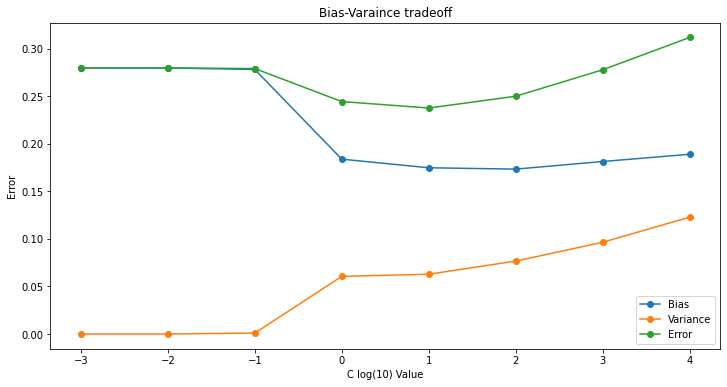

In [ ]:
import pandas as pd
from sklearn.metrics import explained_variance_score

c_vals2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
print('Dataset 2:')
bias_2 = []
var_2 = []
err_2 = []
for j in c_vals2:
  svmClassifier = svm.SVC(kernel='rbf',gamma=0.01, C=j)
  svmClassifier.fit(dataset2_prepared, y_train2)
  
  mse, bias, var = bias_variance_decomp(svmClassifier, np.array(dataset2_prepared), np.array(y_train2), np.array(dataset2_test_prepared), np.array(y_test2), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_2.append(bias)
  var_2.append(var)
  err_2.append(mse)

plot_bias_var_tradeoff(range(-3,5), bias_2, var_2, err_2)

#Underfitting when C<1, overfitting when C>1

---------- LINEAR ----------

Dataset 2:
0.001
0.01
0.1
1
10
100


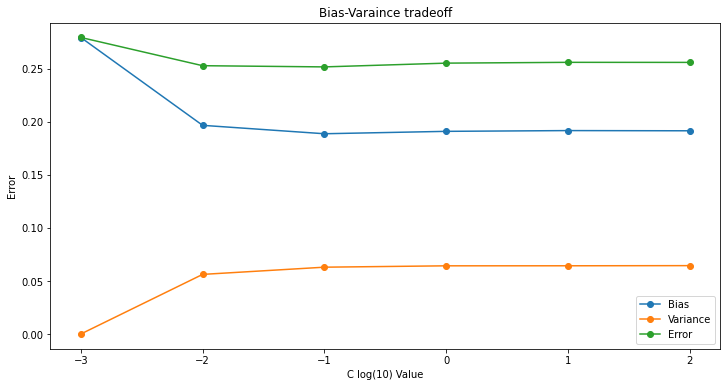

In [ ]:
import pandas as pd
from sklearn.metrics import explained_variance_score

c_vals2 = [0.001, 0.01, 0.1, 1, 10, 100]
print('Dataset 2:')
bias_2 = []
var_2 = []
err_2 = []
for j in c_vals2:
  svmClassifier = svm.SVC(kernel='linear',gamma=0.01, C=j)
  svmClassifier.fit(dataset2_prepared, y_train2)
  
  mse, bias, var = bias_variance_decomp(svmClassifier, np.array(dataset2_prepared), np.array(y_train2), np.array(dataset2_test_prepared), np.array(y_test2), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_2.append(bias)
  var_2.append(var)
  err_2.append(mse)
  print(j)

plot_bias_var_tradeoff(range(-3,3), bias_2, var_2, err_2)

#Underfitting when C<0.01, overfitting when C>0.01

In [ ]:
from sklearn.model_selection import cross_val_score

#Create updated classifier
classifierNew2 = svm.SVC(kernel='linear',gamma=0.01, C=0.01)
classifierNew2.fit(dataset2_prepared, y_train2)
y_pred2 = classifierNew2.predict(dataset2_test_prepared)


scores = cross_val_score(classifierNew2, dataset2_prepared, y_train2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.04)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[65  2]
 [21  5]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        67
           1       0.71      0.19      0.30        26

    accuracy                           0.75        93
   macro avg       0.74      0.58      0.58        93
weighted avg       0.74      0.75      0.70        93



In [ ]:
import numpy as np
from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2+1, y_pred2, pos_label=2)
metrics.auc(fpr2, tpr2)

0.5812284730195179